In [53]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
Titanic_passengers = pd.read_csv("data/train.csv")
Titanic_passengers



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
Titanic_passengers = Titanic_passengers.drop(['Cabin','Ticket','Name','PassengerId'], axis='columns')

Titanic_passengers = pd.get_dummies(Titanic_passengers, prefix=['Sex', 'Embarked'], drop_first=True)

#Titanic_passengers = pd.concat([Titanic_passengers, dummies1], axis='columns')

# Shape of our dataset
Titanic_passengers.shape

# Info our dataset
Titanic_passengers.info()

# Describe our dataset
Titanic_passengers.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [55]:
Titanic_passengers = Titanic_passengers.dropna()
Titanic_passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    714 non-null    int64  
 1   Pclass      714 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       714 non-null    int64  
 4   Parch       714 non-null    int64  
 5   Fare        714 non-null    float64
 6   Sex_male    714 non-null    uint8  
 7   Embarked_Q  714 non-null    uint8  
 8   Embarked_S  714 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 41.1 KB


In [56]:
import matplotlib.pyplot as plt 
import seaborn as sns
# Using pairplot we'll visualize the data for correlation
#sns.pairplot(Titanic_passengers, x_vars=['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S'], y_vars='Survived', height=10, aspect=1, kind='scatter')
#plt.show()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,-0.538826,-0.049549,-0.164235
Pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,0.155460,0.132415,0.203980
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.022405,-0.032523
SibSp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,-0.103950,0.051619,0.021751
Parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,-0.246972,-0.009126,0.015833
Fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,-0.184994,-0.062765,-0.253991
Sex_male,-0.538826,0.155460,0.093254,-0.103950,-0.246972,-0.184994,1.000000,-0.026440,0.115167
Embarked_Q,-0.049549,0.132415,-0.022405,0.051619,-0.009126,-0.062765,-0.026440,1.000000,-0.375934
Embarked_S,-0.164235,0.203980,-0.032523,0.021751,0.015833,-0.253991,0.115167,-0.375934,1.000000


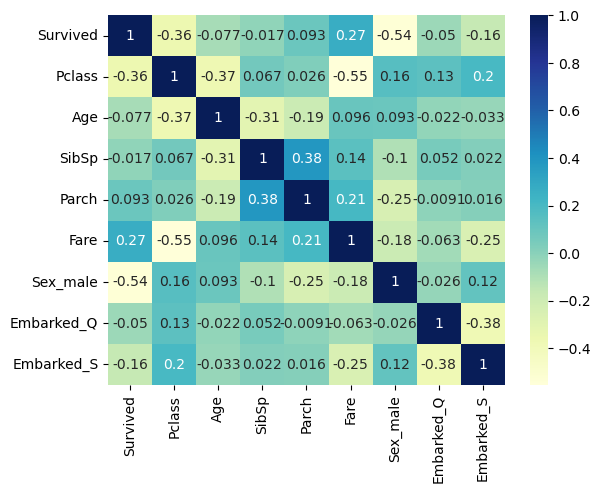

In [57]:
# Visualizing the data using heatmap
sns.heatmap(Titanic_passengers.corr(), cmap="YlGnBu", annot = True)
Titanic_passengers.corr()
#plt.show()

In [58]:
#PERFORMING Y= C+mX
X = Titanic_passengers.iloc[:, 1:].values
Y = Titanic_passengers.iloc[:, 0:1].values #Titanic_passengers['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)



In [59]:
#Fitting the MLR model to the training set:  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train, Y_train)  



LinearRegression()

In [72]:
#Predicting the Test set result;  
#Y_pred = pd.dataframe()
Y_pred= regressor.predict(X_test) 
Y_pred = np.rint(Y_pred)
print(type(Y_pred))
bins = [0,0.5,1]
groups = [0,1]
#Y_pred= pd.cut(Y_pred, bins=bins, labels=groups)
print(Y_pred)

<class 'numpy.ndarray'>
[[ 0.13071534]
 [ 0.5333627 ]
 [ 0.7648906 ]
 [ 0.37081497]
 [ 0.3439984 ]
 [ 0.38209382]
 [ 0.24439062]
 [ 0.07190775]
 [ 0.02543383]
 [ 0.33954593]
 [ 0.07798179]
 [ 0.29512946]
 [ 0.40716579]
 [ 0.16045854]
 [ 0.33840021]
 [ 0.34980729]
 [ 0.64657231]
 [ 0.41867451]
 [ 0.52551961]
 [ 0.16065545]
 [ 0.23883161]
 [ 0.68627086]
 [ 0.15510714]
 [-0.05022332]
 [ 0.00329068]
 [ 0.9203632 ]
 [ 0.09911142]
 [ 0.16784855]
 [ 0.79023998]
 [ 0.15516965]
 [ 0.17554993]
 [ 0.26276576]
 [ 0.07942692]
 [ 0.35611166]
 [ 0.64639008]
 [ 0.89536566]
 [ 0.22853538]
 [ 0.50502635]
 [ 0.43647056]
 [ 0.76989408]
 [ 0.09569064]
 [ 0.84040788]
 [ 0.1551535 ]
 [ 0.3113879 ]
 [ 0.69596174]
 [ 0.3745255 ]
 [ 0.09572146]
 [ 0.40792146]
 [ 0.18179929]
 [ 0.13550364]
 [ 0.24439062]
 [ 0.37611178]
 [ 0.59409876]
 [ 0.58427936]
 [ 0.12263604]
 [ 0.63021968]
 [ 1.04838919]
 [-0.05713694]
 [ 0.31395353]
 [ 0.85655635]
 [ 0.59589191]
 [ 0.34362659]
 [-0.0072037 ]
 [ 0.1118945 ]
 [ 0.47178757]
 

In [61]:
print('Train Score: ', regressor.score(X_train, Y_train))  
print('Test Score: ', regressor.score(X_test, Y_test))  

Train Score:  0.4138225892226943
Test Score:  0.3572473558214292
